In [8]:
from utils import *
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt


'\ncalculuate log returns for both dlp and trn\nremove outliers\ncalculate\ntrain classifer kmeans\n'

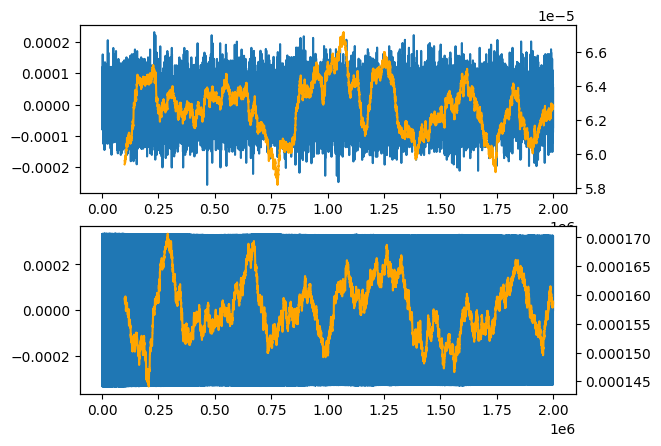

In [11]:
reader = PriceReader()
trn = reader(['DIVING_GEAR'], [0, 1])
dlp = reader(['DOLPHIN_SIGHTINGS'], [0, 1])

trn['log_returns'] = np.log(trn['mid_price'].shift(1) / trn['mid_price'])
dlp['log_returns'] = np.log(dlp['mid_price'].shift(1) / dlp['mid_price'])

dlp = dlp.loc[abs(dlp['log_returns']) < 0.0005]
trn = trn.loc[dlp.index]

fig, axl = plt.subplots(2, 1)
axl[0].plot(trn['log_returns'])
axl[1].plot(dlp['log_returns'])

s = 1000
trn['vol'] = trn['log_returns'].rolling(s).std()
dlp['vol'] = dlp['log_returns'].rolling(s).std()

axr = [axl[0].twinx(), axl[1].twinx()]
axr[0].plot(trn['vol'], color='orange')
axr[1].plot(dlp['vol'], color='orange')


In [47]:
dvgvol = trn['vol'].fillna(0).to_numpy()
dlpvol = dlp['vol'].fillna(0).to_numpy()
combined_data = np.hstack((dvgvol.reshape(-1, 1), dlpvol.reshape(-1, 1)))
km = KMeans(n_clusters=2).fit(combined_data)
km.labels_

/home/andrew/Projects/prosperity/.venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

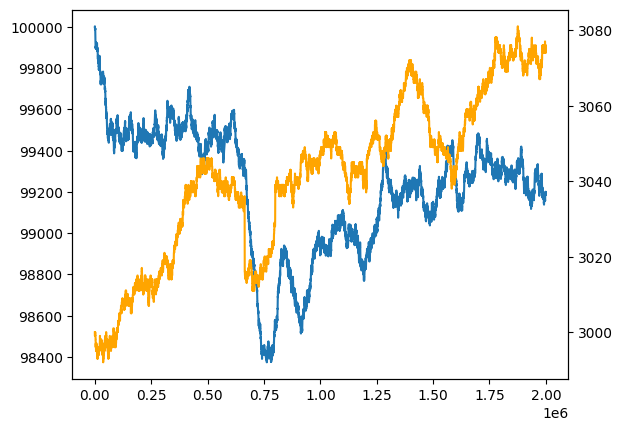

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [53]:
fig, axl = plt.subplots()
axl.plot(trn['mid_price'])

axr = axl.twinx()
axr.plot(dlp['mid_price'], color='orange')

# regime_change_indices = np.where(km.labels_[1:] != km.labels_[:-1])[0]
# axl.axvline()

plt.show()
# regime_change_indices
km.labels_